# メモ Todo 
## 下がる、下がらないのベルーヌーイ分布で確率をだす。
## poisson分布

# フロー
1. 変数の定義
1. 過去のCSVファイルからデータをロードする
1. 前処理モジュールの定義（当日の上昇率、過去からの上昇率、下降率）
1. CSVロードして、並び替え、必要な日付からにする
1. 前処理部分(現在の値と、過去のからの上昇率、下降率を記したDFを作成)
1. 前処理データの保存

# 変数の定義


In [1]:
# 変数の定義
import pandas as pd
import pandas_profiling as pdp

pram_predict_day=1                   # 1日後の予測をする
#pram_predict_plus_percent=0.70            # 70%で上昇率、下降の設定
#pram_predict_minus_percent=0.20           # 40%で上昇率、下降の設定
pram_predict_plus_percent=0.40             # 40%で上昇率、下降の設定
pram_predict_minus_percent=0.40            # 40%で上昇率、下降の設定
pd.set_option('display.max_columns', 100)


YEAR=""
start_date='2000-01-29'             #元データを2000年からにする

# 過去のCSVファイルからデータをロードする


In [25]:
# 過去のCSVファイルからデータをロードする

class load_csv:
    #CSVは右記サイトのからダウンロード https://stooq.com/q/d/?s=zarjpy
    import pandas as pd
    
    def load(self):
        #df_fx=pd.read_csv('data/zarjpy_d.csv')
        df_fx=pd.read_csv('data/stock.csv')
        
        #df.to_csv('data/stock.csv',index=False)
        df_fx=df_fx.ix[:,['Date','Open','Close',"dow_compare"]]
        
        print ("配列長さ:",len(df_fx))
        return df_fx

# 前処理モジュールの定義（当日の上昇率、過去からの上昇率、下降率）


In [26]:
# 偏差値
def Deviation_value(df_tmp,x):
    std=df_tmp.std()['Open']

    mean=df_tmp.mean()['Open']
    deviation=(mean-x)*10/std+50

    return deviation


In [27]:
# 前処理モジュールの定義（当日の上昇率、過去からの上昇率、下降率）


def result(day0,xday):          #day0 当日の上昇率(close/open)の結果を返す
    rate=0  #上昇率
    if ((i-xday)>=0 and data_len>(i-xday)): 
        rate= ((df_fx.iloc[i,close_index]/df_fx.iloc[i,open_index])-1)*100
    return rate

def persent(day0,xday):         #　当日のopen価格と、過去のと比較して上昇率(当日open/過去open)を返す
    rate=0  #上昇率
    if ((i-xday)>=0 and data_len>(i-xday)):        
        rate= ((df_fx.iloc[i,open_index]/df_fx.iloc[i-xday,open_index])-1)*100
        if rate <0:
            rate=0
        #rate=np.log10(rate)
    return rate

def persent_minus(day0,xday):   #　当日のopen価格と、過去のと比較して下降率(-当日open/過去open)を返す
    rate=0  #上昇率
    if ((i-xday)>=0 and data_len>(i-xday)):        
        rate= ((df_fx.iloc[i,open_index]/df_fx.iloc[i-xday,open_index])-1)*100
        if rate>0:
            rate=0
        #rate=np.log10(rate)
    return rate

# CSVロードして、並び替え、必要な日付からにする


In [28]:
LOAD_CSV=load_csv()
df_fx=LOAD_CSV.load()
#df_fx=df_fx.sort_values(by='Date')

df_fx=df_fx[(df_fx['Date']>=start_date )]
df_fx = df_fx.reset_index(drop=True)
data_len=len(df_fx)

df_fx.tail(10)
df_fx.info()

配列長さ: 3152
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3152 entries, 0 to 3151
Data columns (total 4 columns):
Date           3152 non-null object
Open           3152 non-null float64
Close          3152 non-null float64
dow_compare    3152 non-null float64
dtypes: float64(3), object(1)
memory usage: 98.6+ KB


/Users/fujiccofujimoto/.pyenv/versions/Anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [35]:
df=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
df = pd.DataFrame(index=['Date'], columns=[
"Date" ,"Close","Open",
"day+1" ,"day+2" ,"day+3",
"day+4" ,"day+5" ,"day+6",
"day+7" ,"day+8" ,"day+9",
"day+10","day+11","day+12",
"day+13","day+14","day+15",
"day+16","day+17","day+18",
"day+19","day+20","day+21",
"day+22","day+23","day+24",
"day+25","day+26","day+27",
"day+28","day+29","day+30",

"day-1" ,"day-2" ,"day-3",
"day-4" ,"day-5" ,"day-6",
"day-7" ,"day-8" ,"day-9",
"day-10","day-11","day-12",
"day-13","day-14","day-15",
"day-16","day-17","day-18",
"day-19","day-20","day-21",
"day-22","day-23","day-24",
"day-25","day-26","day-27",
"day-28","day-29","day-30",
    
"std-30","std-60","std-90",
    
"dow_compare",
"label_up","label_none","label_down",
#"label2_up","label2_down"
])
df

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
date_index=  df_fx.columns.get_loc('Date')
close_index= df_fx.columns.get_loc('Close')
open_index=  df_fx.columns.get_loc('Open')

dow_compare_index=df_fx.columns.get_loc('dow_compare')


df_fx.head(8)

,Date,Open,Close,dow_compare
0,2007-01-04,17322.50,17353.67,0.05
1,2007-01-05,17315.54,17091.59,-0.66
2,2007-01-09,17018.89,17237.77,-0.06
3,2007-01-10,17192.42,16942.40,0.21
4,2007-01-11,16958.57,16838.17,0.59
5,2007-01-12,16979.73,17057.01,0.33
6,2007-01-16,17190.90,17202.46,0.21
7,2007-01-17,17153.25,17261.35,-0.04


# 前処理部分　（現在の値と、過去のからの上昇率、下降率を記したDFを作成）



In [33]:
#df[["day+28","day+29","day+30","day-28","day-29","day-30",]].tail(30)


In [34]:
# 前処理部分　（現在の値と、過去のからの上昇率、下降率を記したDFを作成
for i in range(data_len) :
    Date_day=df_fx.iloc[i,date_index ]

    if i%100==0:
        print('{0:.1%}'.format(i/data_len),end=" ")

    #当日のOPENの株価
    day0         =df_fx.iloc[i,open_index]
    day0_open    =df_fx.iloc[i,open_index] 
    day0_close   =df_fx.iloc[i,close_index] 
    day0_dow_compare  =df_fx.iloc[i,dow_compare_index] 

    #その後の結果から正解ラベルを作成
    label_up=0     #上昇
    label_none=0   #変化少ない
    label_down=0   #下降

    #正解データの計算  (pram_predict_day) 日後に、(pram_predict_persent)％の前後がある
    prediction=result(day0_open,pram_predict_day)    

    # ３つのらべるの場合
    if prediction>=      pram_predict_plus_percent:
        label_up  =1        #上昇
        label_none=0        #そのまま
        label_down=0        #下降
    elif prediction<=   -pram_predict_minus_percent:
        label_up  =0        #上昇
        label_none=0        #そのまま
        label_down=1        #下降
    else:
        
        label_up  =0        #上昇
        label_none=1        #そのまま
        label_down=0        #下降
    #display(df.tail(30))
    Deviation30=Deviation_value(df.tail(30),day0_open)
    Deviation60=Deviation_value(df.tail(60),day0_open)
    Deviation90=Deviation_value(df.tail(90),day0_open)
    
    series=pd.Series([Date_day,day0_close,day0_open,
                      persent(day0,1),persent(day0,2),persent(day0,3),
                      persent(day0,4),persent(day0,5),persent(day0,6),
                      persent(day0,7),persent(day0,8),persent(day0,9),
                      persent(day0,10),persent(day0,11),persent(day0,12),
                      persent(day0,13),persent(day0,14),persent(day0,15),
                      persent(day0,16),persent(day0,17),persent(day0,18),
                      persent(day0,19),persent(day0,20),persent(day0,21),
                      persent(day0,22),persent(day0,23),persent(day0,24),
                      persent(day0,25),persent(day0,26),persent(day0,27),
                      persent(day0,28),persent(day0,29),persent(day0,30),

                      persent_minus(day0,1),persent_minus(day0,2),persent_minus(day0,3),
                      persent_minus(day0,4),persent_minus(day0,5),persent_minus(day0,6),
                      persent_minus(day0,7),persent_minus(day0,8),persent_minus(day0,9),
                      persent_minus(day0,10),persent_minus(day0,11),persent_minus(day0,12),
                      persent_minus(day0,13),persent_minus(day0,14),persent_minus(day0,15),
                      persent_minus(day0,16),persent_minus(day0,17),persent_minus(day0,18),
                      persent_minus(day0,19),persent_minus(day0,20),persent_minus(day0,21),
                      persent_minus(day0,22),persent_minus(day0,23),persent_minus(day0,24),
                      persent_minus(day0,25),persent_minus(day0,26),persent_minus(day0,27),
                      persent_minus(day0,28),persent_minus(day0,29),persent_minus(day0,30),
                      
                      Deviation30,Deviation60,Deviation90,
                      day0_dow_compare,
                      label_up,label_none,label_down,
                     ]
                      ,index=df.columns)
    series.append
    df=df.append(series,ignore_index = True)

0.0% 

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2258,2016-07-21,16810.22,16855.18,1.25104,1.46333,2.79981,3.774,3.13394,5.6003,9.62048,9.97166,9.82856,9.20486,7.47996,7.37138,6.99861,8.57953,11.6628,11.2327,3.19159,4.6996,4.71781,6.16895,6.41528,7.8263,6.19965,6.68463,5.33704,3.28492,1.30831,0.675844,0.793482,1.22593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.161237,42.083855,43.252224,-0.42,0,1,0
2259,2016-07-22,16627.25,16612.90,0,0,0.00487597,1.32214,2.28233,1.65147,4.08237,8.04478,8.3909,8.24986,7.63512,5.93502,5.828,5.46058,7.01878,10.0578,9.63382,1.70829,3.19462,3.21258,4.64285,4.88564,6.27638,4.67311,5.15113,3.8229,1.80028,0,0,0,-1.43742,-0.204362,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.147919,-0.771292,-0.655345,37.478546,46.223313,47.407643,0.29,0,1,0
2260,2016-07-25,16620.29,16655.81,0.258293,0,0.0534033,0.263182,1.58385,2.54651,1.91403,4.35121,8.32385,8.67087,8.52946,7.91314,6.20865,6.10134,5.73298,7.2952,10.342,9.91699,1.971,3.46117,3.47917,4.91314,5.15656,6.55088,4.94348,5.42272,4.09107,2.06323,0.109992,0,0,-1.18284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.514991,36.417383,45.343700,46.572206,-0.42,0,1,0
2261,2016-07-26,16383.04,16535.81,0,0,0,0,0,0.85197,1.8077,1.17977,3.59939,7.54341,7.88793,7.74754,7.13566,5.44345,5.33692,4.97121,6.52217,9.54705,9.12508,1.23633,2.71576,2.73363,4.15727,4.39894,5.78321,4.18739,4.66319,3.34113,1.32789,0,-0.720469,-0.464037,-1.89479,-0.667451,-0.459184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.611269,38.662177,47.170233,48.602469,-0.10,0,0,1
2262,2016-07-27,16664.82,16526.06,0,0,0,0,0,0,0.792505,1.74767,1.12011,3.53831,7.48,7.82431,7.68401,7.07249,5.38127,5.27481,4.90931,6.45937,9.48246,9.06073,1.17663,2.6552,2.67306,4.09585,4.33738,5.72084,4.12596,4.60147,3.28019,1.26815,-0.0589629,-0.779007,-0.522726,-1.95263,-0.72602,-0.517876,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.690853,47.091170,48.753987,-0.01,1,0,0
2263,2016-07-28,16476.84,16596.15,0.424118,0.364905,0,0,0,0,0,1.21998,2.1792,1.54898,3.97743,7.93584,8.28162,8.14071,7.5266,5.82821,5.72129,5.35425,6.91088,9.9468,9.52328,1.60574,3.09058,3.10851,4.53734,4.77989,6.16922,4.56758,5.04511,3.71822,0,0,-0.358193,-0.100825,-1.5368,-0.304981,-0.0959542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.568353,45.373836,47.476070,-0.09,0,0,1
2264,2016-07-29,16569.27,16359.68,0,0,0,0,0,0,0,0,0,0.723301,0.102062,2.49591,6.39792,6.73877,6.59987,5.99451,4.32032,4.21493,3.85311,5.38756,8.38022,7.96274,0.158015,1.62169,1.63937,3.04784,3.28694,4.65647,3.07765,3.54837,-1.42485,-1.00677,-1.06514,-1.77794,-1.52424,-2.93975,-1.72548,-1.51944,-0.222248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.898638,49.400172,51.590169,-0.13,1,0,0
2265,2016-08-01,16635.77,16415.31,0.340043,0,0,0,0,0,0,0,0,0.11704,1.0658,0.442452,2.84444,6.75972,7.10172,6.96236,6.35494,4.67506,4.5693,4.20626,5.74592,8.74876,8.32986,0.498596,1.96725,1.98499,3.39825,3.63816,5.01235,3.42815,0,-1.08965,-0.670154,-0.728721,-1.44394,-1.18938,-2.6097,-1.39131,-1.18456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.216765,47.987916,50.471678,-0.15,1,0,0
2266,2016-08-02,16391.45,16469.68,0.331215,0.672385,0,0,0,0,0,0,0,0,0.448643,1.40055,0.775133,3.18508,7.11332,7.45646,7.31663,6.7072,5.02176,4.91565,4.55141,6.09617,9.10895,8.68866,0.831462,2.30498,2.32278,3.74072,3.98142,5.36017,0,0,-0.762044,-0.341158,-0.39992,-1.11751,-0.862101,-2.28713,-1.0647,-0.857267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.581311,46.471668,49.353144,-0.49,0,0,1
2267,2016-08-03,16083.11,16227.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2259,2016-07-22,16627.25,16612.90,0,0,0.00487597,1.32214,2.28233,1.65147,4.08237,8.04478,8.3909,8.24986,7.63512,5.93502,5.828,5.46058,7.01878,10.0578,9.63382,1.70829,3.19462,3.21258,4.64285,4.88564,6.27638,4.67311,5.15113,3.8229,1.80028,0,0,0,-1.43742,-0.204362,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.147919,-0.771292,-0.655345,37.478546,46.223313,47.407643,0.29,0,1,0
2260,2016-07-25,16620.29,16655.81,0.258293,0,0.0534033,0.263182,1.58385,2.54651,1.91403,4.35121,8.32385,8.67087,8.52946,7.91314,6.20865,6.10134,5.73298,7.2952,10.342,9.91699,1.971,3.46117,3.47917,4.91314,5.15656,6.55088,4.94348,5.42272,4.09107,2.06323,0.109992,0,0,-1.18284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.514991,36.417383,45.343700,46.572206,-0.42,0,1,0
2261,2016-07-26,16383.04,16535.81,0,0,0,0,0,0.85197,1.8077,1.17977,3.59939,7.54341,7.88793,7.74754,7.13566,5.44345,5.33692,4.97121,6.52217,9.54705,9.12508,1.23633,2.71576,2.73363,4.15727,4.39894,5.78321,4.18739,4.66319,3.34113,1.32789,0,-0.720469,-0.464037,-1.89479,-0.667451,-0.459184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.611269,38.662177,47.170233,48.602469,-0.10,0,0,1
2262,2016-07-27,16664.82,16526.06,0,0,0,0,0,0,0.792505,1.74767,1.12011,3.53831,7.48,7.82431,7.68401,7.07249,5.38127,5.27481,4.90931,6.45937,9.48246,9.06073,1.17663,2.6552,2.67306,4.09585,4.33738,5.72084,4.12596,4.60147,3.28019,1.26815,-0.0589629,-0.779007,-0.522726,-1.95263,-0.72602,-0.517876,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.690853,47.091170,48.753987,-0.01,1,0,0
2263,2016-07-28,16476.84,16596.15,0.424118,0.364905,0,0,0,0,0,1.21998,2.1792,1.54898,3.97743,7.93584,8.28162,8.14071,7.5266,5.82821,5.72129,5.35425,6.91088,9.9468,9.52328,1.60574,3.09058,3.10851,4.53734,4.77989,6.16922,4.56758,5.04511,3.71822,0,0,-0.358193,-0.100825,-1.5368,-0.304981,-0.0959542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.568353,45.373836,47.476070,-0.09,0,0,1
2264,2016-07-29,16569.27,16359.68,0,0,0,0,0,0,0,0,0,0.723301,0.102062,2.49591,6.39792,6.73877,6.59987,5.99451,4.32032,4.21493,3.85311,5.38756,8.38022,7.96274,0.158015,1.62169,1.63937,3.04784,3.28694,4.65647,3.07765,3.54837,-1.42485,-1.00677,-1.06514,-1.77794,-1.52424,-2.93975,-1.72548,-1.51944,-0.222248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.898638,49.400172,51.590169,-0.13,1,0,0
2265,2016-08-01,16635.77,16415.31,0.340043,0,0,0,0,0,0,0,0,0.11704,1.0658,0.442452,2.84444,6.75972,7.10172,6.96236,6.35494,4.67506,4.5693,4.20626,5.74592,8.74876,8.32986,0.498596,1.96725,1.98499,3.39825,3.63816,5.01235,3.42815,0,-1.08965,-0.670154,-0.728721,-1.44394,-1.18938,-2.6097,-1.39131,-1.18456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.216765,47.987916,50.471678,-0.15,1,0,0
2266,2016-08-02,16391.45,16469.68,0.331215,0.672385,0,0,0,0,0,0,0,0,0.448643,1.40055,0.775133,3.18508,7.11332,7.45646,7.31663,6.7072,5.02176,4.91565,4.55141,6.09617,9.10895,8.68866,0.831462,2.30498,2.32278,3.74072,3.98142,5.36017,0,0,-0.762044,-0.341158,-0.39992,-1.11751,-0.862101,-2.28713,-1.0647,-0.857267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.581311,46.471668,49.353144,-0.49,0,0,1
2267,2016-08-03,16083.11,16227.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.66641,5.53683,5.87492,5.73715,5.13669,3.47605,3.37151,3.01262,4.53465,7.50309,7.08899,0,0.799262,0.816796,2.21387,2.45103,-1.4718,-1.14546,-0.809307,-2.22262,-1.80793,-1.86583,-2.57286,-2.32121,-3.72526,-2.52083,-2.31645,-1.02976,-0.0918595,-0.708071,0,0,0,0,0,0,0,0,0,0,0,-0.65257,0,0,0,0,46.806479,51.362516,53.573460,0.23,0,0,1
2268,2016-08-04,16254.89,16168.34,0,0,0

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2260,2016-07-25,16620.29,16655.81,0.258293,0,0.0534033,0.263182,1.58385,2.54651,1.91403,4.35121,8.32385,8.67087,8.52946,7.91314,6.20865,6.10134,5.73298,7.2952,10.342,9.91699,1.971,3.46117,3.47917,4.91314,5.15656,6.55088,4.94348,5.42272,4.09107,2.06323,0.109992,0,0,-1.18284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.514991,36.417383,45.343700,46.572206,-0.42,0,1,0
2261,2016-07-26,16383.04,16535.81,0,0,0,0,0,0.85197,1.8077,1.17977,3.59939,7.54341,7.88793,7.74754,7.13566,5.44345,5.33692,4.97121,6.52217,9.54705,9.12508,1.23633,2.71576,2.73363,4.15727,4.39894,5.78321,4.18739,4.66319,3.34113,1.32789,0,-0.720469,-0.464037,-1.89479,-0.667451,-0.459184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.611269,38.662177,47.170233,48.602469,-0.10,0,0,1
2262,2016-07-27,16664.82,16526.06,0,0,0,0,0,0,0.792505,1.74767,1.12011,3.53831,7.48,7.82431,7.68401,7.07249,5.38127,5.27481,4.90931,6.45937,9.48246,9.06073,1.17663,2.6552,2.67306,4.09585,4.33738,5.72084,4.12596,4.60147,3.28019,1.26815,-0.0589629,-0.779007,-0.522726,-1.95263,-0.72602,-0.517876,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.690853,47.091170,48.753987,-0.01,1,0,0
2263,2016-07-28,16476.84,16596.15,0.424118,0.364905,0,0,0,0,0,1.21998,2.1792,1.54898,3.97743,7.93584,8.28162,8.14071,7.5266,5.82821,5.72129,5.35425,6.91088,9.9468,9.52328,1.60574,3.09058,3.10851,4.53734,4.77989,6.16922,4.56758,5.04511,3.71822,0,0,-0.358193,-0.100825,-1.5368,-0.304981,-0.0959542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.568353,45.373836,47.476070,-0.09,0,0,1
2264,2016-07-29,16569.27,16359.68,0,0,0,0,0,0,0,0,0,0.723301,0.102062,2.49591,6.39792,6.73877,6.59987,5.99451,4.32032,4.21493,3.85311,5.38756,8.38022,7.96274,0.158015,1.62169,1.63937,3.04784,3.28694,4.65647,3.07765,3.54837,-1.42485,-1.00677,-1.06514,-1.77794,-1.52424,-2.93975,-1.72548,-1.51944,-0.222248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.898638,49.400172,51.590169,-0.13,1,0,0
2265,2016-08-01,16635.77,16415.31,0.340043,0,0,0,0,0,0,0,0,0.11704,1.0658,0.442452,2.84444,6.75972,7.10172,6.96236,6.35494,4.67506,4.5693,4.20626,5.74592,8.74876,8.32986,0.498596,1.96725,1.98499,3.39825,3.63816,5.01235,3.42815,0,-1.08965,-0.670154,-0.728721,-1.44394,-1.18938,-2.6097,-1.39131,-1.18456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.216765,47.987916,50.471678,-0.15,1,0,0
2266,2016-08-02,16391.45,16469.68,0.331215,0.672385,0,0,0,0,0,0,0,0,0.448643,1.40055,0.775133,3.18508,7.11332,7.45646,7.31663,6.7072,5.02176,4.91565,4.55141,6.09617,9.10895,8.68866,0.831462,2.30498,2.32278,3.74072,3.98142,5.36017,0,0,-0.762044,-0.341158,-0.39992,-1.11751,-0.862101,-2.28713,-1.0647,-0.857267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.581311,46.471668,49.353144,-0.49,0,0,1
2267,2016-08-03,16083.11,16227.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.66641,5.53683,5.87492,5.73715,5.13669,3.47605,3.37151,3.01262,4.53465,7.50309,7.08899,0,0.799262,0.816796,2.21387,2.45103,-1.4718,-1.14546,-0.809307,-2.22262,-1.80793,-1.86583,-2.57286,-2.32121,-3.72526,-2.52083,-2.31645,-1.02976,-0.0918595,-0.708071,0,0,0,0,0,0,0,0,0,0,0,-0.65257,0,0,0,0,46.806479,51.362516,53.573460,0.23,0,0,1
2268,2016-08-04,16254.89,16168.34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.29714,5.15351,5.49037,5.3531,4.75481,3.10021,2.99605,2.63847,4.15497,7.11262,6.70002,0,0.433143,0.450614,1.84261,-0.363216,-1.82967,-1.50451,-1.16958,-2.57777,-2.16458,-2.22227,-2.92673,-2.67599,-4.07495,-2.87489,-2.67125,-1.38923,-0.454741,-1.06871,0,0,0,0,0,0,0,0,0,0,0,-1.01342,0,0,0,48.192005,52.546889,54.485330,-0.02,1,0,0
2269,2016-08-05,16254.45,16

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2261,2016-07-26,16383.04,16535.81,0,0,0,0,0,0.85197,1.8077,1.17977,3.59939,7.54341,7.88793,7.74754,7.13566,5.44345,5.33692,4.97121,6.52217,9.54705,9.12508,1.23633,2.71576,2.73363,4.15727,4.39894,5.78321,4.18739,4.66319,3.34113,1.32789,0,-0.720469,-0.464037,-1.89479,-0.667451,-0.459184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.611269,38.662177,47.170233,48.602469,-0.10,0,0,1
2262,2016-07-27,16664.82,16526.06,0,0,0,0,0,0,0.792505,1.74767,1.12011,3.53831,7.48,7.82431,7.68401,7.07249,5.38127,5.27481,4.90931,6.45937,9.48246,9.06073,1.17663,2.6552,2.67306,4.09585,4.33738,5.72084,4.12596,4.60147,3.28019,1.26815,-0.0589629,-0.779007,-0.522726,-1.95263,-0.72602,-0.517876,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.690853,47.091170,48.753987,-0.01,1,0,0
2263,2016-07-28,16476.84,16596.15,0.424118,0.364905,0,0,0,0,0,1.21998,2.1792,1.54898,3.97743,7.93584,8.28162,8.14071,7.5266,5.82821,5.72129,5.35425,6.91088,9.9468,9.52328,1.60574,3.09058,3.10851,4.53734,4.77989,6.16922,4.56758,5.04511,3.71822,0,0,-0.358193,-0.100825,-1.5368,-0.304981,-0.0959542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.568353,45.373836,47.476070,-0.09,0,0,1
2264,2016-07-29,16569.27,16359.68,0,0,0,0,0,0,0,0,0,0.723301,0.102062,2.49591,6.39792,6.73877,6.59987,5.99451,4.32032,4.21493,3.85311,5.38756,8.38022,7.96274,0.158015,1.62169,1.63937,3.04784,3.28694,4.65647,3.07765,3.54837,-1.42485,-1.00677,-1.06514,-1.77794,-1.52424,-2.93975,-1.72548,-1.51944,-0.222248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.898638,49.400172,51.590169,-0.13,1,0,0
2265,2016-08-01,16635.77,16415.31,0.340043,0,0,0,0,0,0,0,0,0.11704,1.0658,0.442452,2.84444,6.75972,7.10172,6.96236,6.35494,4.67506,4.5693,4.20626,5.74592,8.74876,8.32986,0.498596,1.96725,1.98499,3.39825,3.63816,5.01235,3.42815,0,-1.08965,-0.670154,-0.728721,-1.44394,-1.18938,-2.6097,-1.39131,-1.18456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.216765,47.987916,50.471678,-0.15,1,0,0
2266,2016-08-02,16391.45,16469.68,0.331215,0.672385,0,0,0,0,0,0,0,0,0.448643,1.40055,0.775133,3.18508,7.11332,7.45646,7.31663,6.7072,5.02176,4.91565,4.55141,6.09617,9.10895,8.68866,0.831462,2.30498,2.32278,3.74072,3.98142,5.36017,0,0,-0.762044,-0.341158,-0.39992,-1.11751,-0.862101,-2.28713,-1.0647,-0.857267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.581311,46.471668,49.353144,-0.49,0,0,1
2267,2016-08-03,16083.11,16227.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.66641,5.53683,5.87492,5.73715,5.13669,3.47605,3.37151,3.01262,4.53465,7.50309,7.08899,0,0.799262,0.816796,2.21387,2.45103,-1.4718,-1.14546,-0.809307,-2.22262,-1.80793,-1.86583,-2.57286,-2.32121,-3.72526,-2.52083,-2.31645,-1.02976,-0.0918595,-0.708071,0,0,0,0,0,0,0,0,0,0,0,-0.65257,0,0,0,0,46.806479,51.362516,53.573460,0.23,0,0,1
2268,2016-08-04,16254.89,16168.34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.29714,5.15351,5.49037,5.3531,4.75481,3.10021,2.99605,2.63847,4.15497,7.11262,6.70002,0,0.433143,0.450614,1.84261,-0.363216,-1.82967,-1.50451,-1.16958,-2.57777,-2.16458,-2.22227,-2.92673,-2.67599,-4.07495,-2.87489,-2.67125,-1.38923,-0.454741,-1.06871,0,0,0,0,0,0,0,0,0,0,0,-1.01342,0,0,0,48.192005,52.546889,54.485330,-0.02,1,0,0
2269,2016-08-05,16254.45,16278.99,0.684362,0.318661,0,0,0,0,0,0,0,0,0,0,0,0,0.226509,0,1.99038,5.87314,6.2123,6.0741,5.47172,3.80579,3.70091,3.34089,4.86776,7.84566,7.43024,0,1.12047,1.13806,0,0,-1.15782,-0.830444,-0.493225,-1.91105,-1.49503,-1.55311,-2.26239,-2.00994,-3.41847,-2.2102,-2.00517,-0.714376,0,-0.391666,0,0,0,0,0,0,0,0,0,0,0,-0.335989,0,0,46.230987,50.313225,52.359507,1.04,0,1,0
2270,2016-08-

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2262,2016-07-27,16664.82,16526.06,0,0,0,0,0,0,0.792505,1.74767,1.12011,3.53831,7.48,7.82431,7.68401,7.07249,5.38127,5.27481,4.90931,6.45937,9.48246,9.06073,1.17663,2.6552,2.67306,4.09585,4.33738,5.72084,4.12596,4.60147,3.28019,1.26815,-0.0589629,-0.779007,-0.522726,-1.95263,-0.72602,-0.517876,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.690853,47.091170,48.753987,-0.01,1,0,0
2263,2016-07-28,16476.84,16596.15,0.424118,0.364905,0,0,0,0,0,1.21998,2.1792,1.54898,3.97743,7.93584,8.28162,8.14071,7.5266,5.82821,5.72129,5.35425,6.91088,9.9468,9.52328,1.60574,3.09058,3.10851,4.53734,4.77989,6.16922,4.56758,5.04511,3.71822,0,0,-0.358193,-0.100825,-1.5368,-0.304981,-0.0959542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.568353,45.373836,47.476070,-0.09,0,0,1
2264,2016-07-29,16569.27,16359.68,0,0,0,0,0,0,0,0,0,0.723301,0.102062,2.49591,6.39792,6.73877,6.59987,5.99451,4.32032,4.21493,3.85311,5.38756,8.38022,7.96274,0.158015,1.62169,1.63937,3.04784,3.28694,4.65647,3.07765,3.54837,-1.42485,-1.00677,-1.06514,-1.77794,-1.52424,-2.93975,-1.72548,-1.51944,-0.222248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.898638,49.400172,51.590169,-0.13,1,0,0
2265,2016-08-01,16635.77,16415.31,0.340043,0,0,0,0,0,0,0,0,0.11704,1.0658,0.442452,2.84444,6.75972,7.10172,6.96236,6.35494,4.67506,4.5693,4.20626,5.74592,8.74876,8.32986,0.498596,1.96725,1.98499,3.39825,3.63816,5.01235,3.42815,0,-1.08965,-0.670154,-0.728721,-1.44394,-1.18938,-2.6097,-1.39131,-1.18456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.216765,47.987916,50.471678,-0.15,1,0,0
2266,2016-08-02,16391.45,16469.68,0.331215,0.672385,0,0,0,0,0,0,0,0,0.448643,1.40055,0.775133,3.18508,7.11332,7.45646,7.31663,6.7072,5.02176,4.91565,4.55141,6.09617,9.10895,8.68866,0.831462,2.30498,2.32278,3.74072,3.98142,5.36017,0,0,-0.762044,-0.341158,-0.39992,-1.11751,-0.862101,-2.28713,-1.0647,-0.857267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.581311,46.471668,49.353144,-0.49,0,0,1
2267,2016-08-03,16083.11,16227.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.66641,5.53683,5.87492,5.73715,5.13669,3.47605,3.37151,3.01262,4.53465,7.50309,7.08899,0,0.799262,0.816796,2.21387,2.45103,-1.4718,-1.14546,-0.809307,-2.22262,-1.80793,-1.86583,-2.57286,-2.32121,-3.72526,-2.52083,-2.31645,-1.02976,-0.0918595,-0.708071,0,0,0,0,0,0,0,0,0,0,0,-0.65257,0,0,0,0,46.806479,51.362516,53.573460,0.23,0,0,1
2268,2016-08-04,16254.89,16168.34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.29714,5.15351,5.49037,5.3531,4.75481,3.10021,2.99605,2.63847,4.15497,7.11262,6.70002,0,0.433143,0.450614,1.84261,-0.363216,-1.82967,-1.50451,-1.16958,-2.57777,-2.16458,-2.22227,-2.92673,-2.67599,-4.07495,-2.87489,-2.67125,-1.38923,-0.454741,-1.06871,0,0,0,0,0,0,0,0,0,0,0,-1.01342,0,0,0,48.192005,52.546889,54.485330,-0.02,1,0,0
2269,2016-08-05,16254.45,16278.99,0.684362,0.318661,0,0,0,0,0,0,0,0,0,0,0,0,0.226509,0,1.99038,5.87314,6.2123,6.0741,5.47172,3.80579,3.70091,3.34089,4.86776,7.84566,7.43024,0,1.12047,1.13806,0,0,-1.15782,-0.830444,-0.493225,-1.91105,-1.49503,-1.55311,-2.26239,-2.00994,-3.41847,-2.2102,-2.00517,-0.714376,0,-0.391666,0,0,0,0,0,0,0,0,0,0,0,-0.335989,0,0,46.230987,50.313225,52.359507,1.04,0,1,0
2270,2016-08-08,16650.57,16462.29,1.12599,1.81806,1.44824,0,0.286196,0.627213,0,0,0,0,0,0,0,0,0.403571,1.35505,0.729915,3.13878,7.06526,7.40825,7.26848,6.65932,4.97463,4.86858,4.50449,6.04857,9.06,8.63989,0.786219,2.25908,0,0,0,-0.0448703,0,0,-0.806573,-0.385875,-0.444611,-1.16188,-0.906585,-2.33097,-1.10909,-0.901753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.811097,46.637282,48.916437,-0.08,1,0,0
2271,

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2263,2016-07-28,16476.84,16596.15,0.424118,0.364905,0,0,0,0,0,1.21998,2.1792,1.54898,3.97743,7.93584,8.28162,8.14071,7.5266,5.82821,5.72129,5.35425,6.91088,9.9468,9.52328,1.60574,3.09058,3.10851,4.53734,4.77989,6.16922,4.56758,5.04511,3.71822,0,0,-0.358193,-0.100825,-1.5368,-0.304981,-0.0959542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.568353,45.373836,47.476070,-0.09,0,0,1
2264,2016-07-29,16569.27,16359.68,0,0,0,0,0,0,0,0,0,0.723301,0.102062,2.49591,6.39792,6.73877,6.59987,5.99451,4.32032,4.21493,3.85311,5.38756,8.38022,7.96274,0.158015,1.62169,1.63937,3.04784,3.28694,4.65647,3.07765,3.54837,-1.42485,-1.00677,-1.06514,-1.77794,-1.52424,-2.93975,-1.72548,-1.51944,-0.222248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.898638,49.400172,51.590169,-0.13,1,0,0
2265,2016-08-01,16635.77,16415.31,0.340043,0,0,0,0,0,0,0,0,0.11704,1.0658,0.442452,2.84444,6.75972,7.10172,6.96236,6.35494,4.67506,4.5693,4.20626,5.74592,8.74876,8.32986,0.498596,1.96725,1.98499,3.39825,3.63816,5.01235,3.42815,0,-1.08965,-0.670154,-0.728721,-1.44394,-1.18938,-2.6097,-1.39131,-1.18456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.216765,47.987916,50.471678,-0.15,1,0,0
2266,2016-08-02,16391.45,16469.68,0.331215,0.672385,0,0,0,0,0,0,0,0,0.448643,1.40055,0.775133,3.18508,7.11332,7.45646,7.31663,6.7072,5.02176,4.91565,4.55141,6.09617,9.10895,8.68866,0.831462,2.30498,2.32278,3.74072,3.98142,5.36017,0,0,-0.762044,-0.341158,-0.39992,-1.11751,-0.862101,-2.28713,-1.0647,-0.857267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.581311,46.471668,49.353144,-0.49,0,0,1
2267,2016-08-03,16083.11,16227.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.66641,5.53683,5.87492,5.73715,5.13669,3.47605,3.37151,3.01262,4.53465,7.50309,7.08899,0,0.799262,0.816796,2.21387,2.45103,-1.4718,-1.14546,-0.809307,-2.22262,-1.80793,-1.86583,-2.57286,-2.32121,-3.72526,-2.52083,-2.31645,-1.02976,-0.0918595,-0.708071,0,0,0,0,0,0,0,0,0,0,0,-0.65257,0,0,0,0,46.806479,51.362516,53.573460,0.23,0,0,1
2268,2016-08-04,16254.89,16168.34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.29714,5.15351,5.49037,5.3531,4.75481,3.10021,2.99605,2.63847,4.15497,7.11262,6.70002,0,0.433143,0.450614,1.84261,-0.363216,-1.82967,-1.50451,-1.16958,-2.57777,-2.16458,-2.22227,-2.92673,-2.67599,-4.07495,-2.87489,-2.67125,-1.38923,-0.454741,-1.06871,0,0,0,0,0,0,0,0,0,0,0,-1.01342,0,0,0,48.192005,52.546889,54.485330,-0.02,1,0,0
2269,2016-08-05,16254.45,16278.99,0.684362,0.318661,0,0,0,0,0,0,0,0,0,0,0,0,0.226509,0,1.99038,5.87314,6.2123,6.0741,5.47172,3.80579,3.70091,3.34089,4.86776,7.84566,7.43024,0,1.12047,1.13806,0,0,-1.15782,-0.830444,-0.493225,-1.91105,-1.49503,-1.55311,-2.26239,-2.00994,-3.41847,-2.2102,-2.00517,-0.714376,0,-0.391666,0,0,0,0,0,0,0,0,0,0,0,-0.335989,0,0,46.230987,50.313225,52.359507,1.04,0,1,0
2270,2016-08-08,16650.57,16462.29,1.12599,1.81806,1.44824,0,0.286196,0.627213,0,0,0,0,0,0,0,0,0.403571,1.35505,0.729915,3.13878,7.06526,7.40825,7.26848,6.65932,4.97463,4.86858,4.50449,6.04857,9.06,8.63989,0.786219,2.25908,0,0,0,-0.0448703,0,0,-0.806573,-0.385875,-0.444611,-1.16188,-0.906585,-2.33097,-1.10909,-0.901753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.811097,46.637282,48.916437,-0.08,1,0,0
2271,2016-08-09,16764.97,16632.41,1.03339,2.17102,2.87024,2.4966,0.988058,1.32255,1.66709,0.218484,0.643529,0.584187,0,0.117439,0,0,0.122321,1.44113,2.40245,1.77085,4.20461,8.17166,8.51819,8.37699,7.76153,6.05943,5.95228,5.58444,7.14446,10.187,9.76257,1.82774,0,0,0,0,0,0,0,0,0,0,-0.140492,0,-1.32167,-0.0871633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.840991,43.103393,45.676292,0.02,1,0,0
2272

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2264,2016-07-29,16569.27,16359.68,0,0,0,0,0,0,0,0,0,0.723301,0.102062,2.49591,6.39792,6.73877,6.59987,5.99451,4.32032,4.21493,3.85311,5.38756,8.38022,7.96274,0.158015,1.62169,1.63937,3.04784,3.28694,4.65647,3.07765,3.54837,-1.42485,-1.00677,-1.06514,-1.77794,-1.52424,-2.93975,-1.72548,-1.51944,-0.222248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.898638,49.400172,51.590169,-0.13,1,0,0
2265,2016-08-01,16635.77,16415.31,0.340043,0,0,0,0,0,0,0,0,0.11704,1.0658,0.442452,2.84444,6.75972,7.10172,6.96236,6.35494,4.67506,4.5693,4.20626,5.74592,8.74876,8.32986,0.498596,1.96725,1.98499,3.39825,3.63816,5.01235,3.42815,0,-1.08965,-0.670154,-0.728721,-1.44394,-1.18938,-2.6097,-1.39131,-1.18456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.216765,47.987916,50.471678,-0.15,1,0,0
2266,2016-08-02,16391.45,16469.68,0.331215,0.672385,0,0,0,0,0,0,0,0,0.448643,1.40055,0.775133,3.18508,7.11332,7.45646,7.31663,6.7072,5.02176,4.91565,4.55141,6.09617,9.10895,8.68866,0.831462,2.30498,2.32278,3.74072,3.98142,5.36017,0,0,-0.762044,-0.341158,-0.39992,-1.11751,-0.862101,-2.28713,-1.0647,-0.857267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.581311,46.471668,49.353144,-0.49,0,0,1
2267,2016-08-03,16083.11,16227.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.66641,5.53683,5.87492,5.73715,5.13669,3.47605,3.37151,3.01262,4.53465,7.50309,7.08899,0,0.799262,0.816796,2.21387,2.45103,-1.4718,-1.14546,-0.809307,-2.22262,-1.80793,-1.86583,-2.57286,-2.32121,-3.72526,-2.52083,-2.31645,-1.02976,-0.0918595,-0.708071,0,0,0,0,0,0,0,0,0,0,0,-0.65257,0,0,0,0,46.806479,51.362516,53.573460,0.23,0,0,1
2268,2016-08-04,16254.89,16168.34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.29714,5.15351,5.49037,5.3531,4.75481,3.10021,2.99605,2.63847,4.15497,7.11262,6.70002,0,0.433143,0.450614,1.84261,-0.363216,-1.82967,-1.50451,-1.16958,-2.57777,-2.16458,-2.22227,-2.92673,-2.67599,-4.07495,-2.87489,-2.67125,-1.38923,-0.454741,-1.06871,0,0,0,0,0,0,0,0,0,0,0,-1.01342,0,0,0,48.192005,52.546889,54.485330,-0.02,1,0,0
2269,2016-08-05,16254.45,16278.99,0.684362,0.318661,0,0,0,0,0,0,0,0,0,0,0,0,0.226509,0,1.99038,5.87314,6.2123,6.0741,5.47172,3.80579,3.70091,3.34089,4.86776,7.84566,7.43024,0,1.12047,1.13806,0,0,-1.15782,-0.830444,-0.493225,-1.91105,-1.49503,-1.55311,-2.26239,-2.00994,-3.41847,-2.2102,-2.00517,-0.714376,0,-0.391666,0,0,0,0,0,0,0,0,0,0,0,-0.335989,0,0,46.230987,50.313225,52.359507,1.04,0,1,0
2270,2016-08-08,16650.57,16462.29,1.12599,1.81806,1.44824,0,0.286196,0.627213,0,0,0,0,0,0,0,0,0.403571,1.35505,0.729915,3.13878,7.06526,7.40825,7.26848,6.65932,4.97463,4.86858,4.50449,6.04857,9.06,8.63989,0.786219,2.25908,0,0,0,-0.0448703,0,0,-0.806573,-0.385875,-0.444611,-1.16188,-0.906585,-2.33097,-1.10909,-0.901753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.811097,46.637282,48.916437,-0.08,1,0,0
2271,2016-08-09,16764.97,16632.41,1.03339,2.17102,2.87024,2.4966,0.988058,1.32255,1.66709,0.218484,0.643529,0.584187,0,0.117439,0,0,0.122321,1.44113,2.40245,1.77085,4.20461,8.17166,8.51819,8.37699,7.76153,6.05943,5.95228,5.58444,7.14446,10.187,9.76257,1.82774,0,0,0,0,0,0,0,0,0,0,-0.140492,0,-1.32167,-0.0871633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.840991,43.103393,45.676292,0.02,1,0,0
2272,2016-08-10,16735.12,16699.08,0.400844,1.43838,2.58057,3.28259,2.90745,1.39286,1.72869,2.07461,0.620204,1.04695,0.987372,0.259789,0.518753,0,0.313331,0.523655,1.84775,2.81292,2.17879,4.62231,8.60526,8.95318,8.81141,8.19348,6.48457,6.37698,6.00766,7.57395,10.6287,10.2025,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.926125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.909402,41.844650,44.357241,-0.20,0,1,0
227

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2265,2016-08-01,16635.77,16415.31,0.340043,0,0,0,0,0,0,0,0,0.11704,1.0658,0.442452,2.84444,6.75972,7.10172,6.96236,6.35494,4.67506,4.5693,4.20626,5.74592,8.74876,8.32986,0.498596,1.96725,1.98499,3.39825,3.63816,5.01235,3.42815,0,-1.08965,-0.670154,-0.728721,-1.44394,-1.18938,-2.6097,-1.39131,-1.18456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.216765,47.987916,50.471678,-0.15,1,0,0
2266,2016-08-02,16391.45,16469.68,0.331215,0.672385,0,0,0,0,0,0,0,0,0.448643,1.40055,0.775133,3.18508,7.11332,7.45646,7.31663,6.7072,5.02176,4.91565,4.55141,6.09617,9.10895,8.68866,0.831462,2.30498,2.32278,3.74072,3.98142,5.36017,0,0,-0.762044,-0.341158,-0.39992,-1.11751,-0.862101,-2.28713,-1.0647,-0.857267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.581311,46.471668,49.353144,-0.49,0,0,1
2267,2016-08-03,16083.11,16227.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.66641,5.53683,5.87492,5.73715,5.13669,3.47605,3.37151,3.01262,4.53465,7.50309,7.08899,0,0.799262,0.816796,2.21387,2.45103,-1.4718,-1.14546,-0.809307,-2.22262,-1.80793,-1.86583,-2.57286,-2.32121,-3.72526,-2.52083,-2.31645,-1.02976,-0.0918595,-0.708071,0,0,0,0,0,0,0,0,0,0,0,-0.65257,0,0,0,0,46.806479,51.362516,53.573460,0.23,0,0,1
2268,2016-08-04,16254.89,16168.34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.29714,5.15351,5.49037,5.3531,4.75481,3.10021,2.99605,2.63847,4.15497,7.11262,6.70002,0,0.433143,0.450614,1.84261,-0.363216,-1.82967,-1.50451,-1.16958,-2.57777,-2.16458,-2.22227,-2.92673,-2.67599,-4.07495,-2.87489,-2.67125,-1.38923,-0.454741,-1.06871,0,0,0,0,0,0,0,0,0,0,0,-1.01342,0,0,0,48.192005,52.546889,54.485330,-0.02,1,0,0
2269,2016-08-05,16254.45,16278.99,0.684362,0.318661,0,0,0,0,0,0,0,0,0,0,0,0,0.226509,0,1.99038,5.87314,6.2123,6.0741,5.47172,3.80579,3.70091,3.34089,4.86776,7.84566,7.43024,0,1.12047,1.13806,0,0,-1.15782,-0.830444,-0.493225,-1.91105,-1.49503,-1.55311,-2.26239,-2.00994,-3.41847,-2.2102,-2.00517,-0.714376,0,-0.391666,0,0,0,0,0,0,0,0,0,0,0,-0.335989,0,0,46.230987,50.313225,52.359507,1.04,0,1,0
2270,2016-08-08,16650.57,16462.29,1.12599,1.81806,1.44824,0,0.286196,0.627213,0,0,0,0,0,0,0,0,0.403571,1.35505,0.729915,3.13878,7.06526,7.40825,7.26848,6.65932,4.97463,4.86858,4.50449,6.04857,9.06,8.63989,0.786219,2.25908,0,0,0,-0.0448703,0,0,-0.806573,-0.385875,-0.444611,-1.16188,-0.906585,-2.33097,-1.10909,-0.901753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.811097,46.637282,48.916437,-0.08,1,0,0
2271,2016-08-09,16764.97,16632.41,1.03339,2.17102,2.87024,2.4966,0.988058,1.32255,1.66709,0.218484,0.643529,0.584187,0,0.117439,0,0,0.122321,1.44113,2.40245,1.77085,4.20461,8.17166,8.51819,8.37699,7.76153,6.05943,5.95228,5.58444,7.14446,10.187,9.76257,1.82774,0,0,0,0,0,0,0,0,0,0,-0.140492,0,-1.32167,-0.0871633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.840991,43.103393,45.676292,0.02,1,0,0
2272,2016-08-10,16735.12,16699.08,0.400844,1.43838,2.58057,3.28259,2.90745,1.39286,1.72869,2.07461,0.620204,1.04695,0.987372,0.259789,0.518753,0,0.313331,0.523655,1.84775,2.81292,2.17879,4.62231,8.60526,8.95318,8.81141,8.19348,6.48457,6.37698,6.00766,7.57395,10.6287,10.2025,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.926125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.909402,41.844650,44.357241,-0.20,0,1,0
2273,2016-08-12,16919.92,16877.18,1.06653,1.47164,2.52024,3.67461,4.38412,4.00498,2.47424,2.81365,3.16326,1.69334,2.12464,2.06443,1.32909,1.59081,0.130524,1.3832,1.59577,2.93399,3.90945,3.26856,5.73813,9.76357,10.1152,9.97191,9.3474,7.62025,7.51152,7.13826,8.72125,11.8086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.932379,38.198334,40.919365,-0.20,0,1,0
2274,2016-08-15,1

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2266,2016-08-02,16391.45,16469.68,0.331215,0.672385,0,0,0,0,0,0,0,0,0.448643,1.40055,0.775133,3.18508,7.11332,7.45646,7.31663,6.7072,5.02176,4.91565,4.55141,6.09617,9.10895,8.68866,0.831462,2.30498,2.32278,3.74072,3.98142,5.36017,0,0,-0.762044,-0.341158,-0.39992,-1.11751,-0.862101,-2.28713,-1.0647,-0.857267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.581311,46.471668,49.353144,-0.49,0,0,1
2267,2016-08-03,16083.11,16227.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.66641,5.53683,5.87492,5.73715,5.13669,3.47605,3.37151,3.01262,4.53465,7.50309,7.08899,0,0.799262,0.816796,2.21387,2.45103,-1.4718,-1.14546,-0.809307,-2.22262,-1.80793,-1.86583,-2.57286,-2.32121,-3.72526,-2.52083,-2.31645,-1.02976,-0.0918595,-0.708071,0,0,0,0,0,0,0,0,0,0,0,-0.65257,0,0,0,0,46.806479,51.362516,53.573460,0.23,0,0,1
2268,2016-08-04,16254.89,16168.34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.29714,5.15351,5.49037,5.3531,4.75481,3.10021,2.99605,2.63847,4.15497,7.11262,6.70002,0,0.433143,0.450614,1.84261,-0.363216,-1.82967,-1.50451,-1.16958,-2.57777,-2.16458,-2.22227,-2.92673,-2.67599,-4.07495,-2.87489,-2.67125,-1.38923,-0.454741,-1.06871,0,0,0,0,0,0,0,0,0,0,0,-1.01342,0,0,0,48.192005,52.546889,54.485330,-0.02,1,0,0
2269,2016-08-05,16254.45,16278.99,0.684362,0.318661,0,0,0,0,0,0,0,0,0,0,0,0,0.226509,0,1.99038,5.87314,6.2123,6.0741,5.47172,3.80579,3.70091,3.34089,4.86776,7.84566,7.43024,0,1.12047,1.13806,0,0,-1.15782,-0.830444,-0.493225,-1.91105,-1.49503,-1.55311,-2.26239,-2.00994,-3.41847,-2.2102,-2.00517,-0.714376,0,-0.391666,0,0,0,0,0,0,0,0,0,0,0,-0.335989,0,0,46.230987,50.313225,52.359507,1.04,0,1,0
2270,2016-08-08,16650.57,16462.29,1.12599,1.81806,1.44824,0,0.286196,0.627213,0,0,0,0,0,0,0,0,0.403571,1.35505,0.729915,3.13878,7.06526,7.40825,7.26848,6.65932,4.97463,4.86858,4.50449,6.04857,9.06,8.63989,0.786219,2.25908,0,0,0,-0.0448703,0,0,-0.806573,-0.385875,-0.444611,-1.16188,-0.906585,-2.33097,-1.10909,-0.901753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.811097,46.637282,48.916437,-0.08,1,0,0
2271,2016-08-09,16764.97,16632.41,1.03339,2.17102,2.87024,2.4966,0.988058,1.32255,1.66709,0.218484,0.643529,0.584187,0,0.117439,0,0,0.122321,1.44113,2.40245,1.77085,4.20461,8.17166,8.51819,8.37699,7.76153,6.05943,5.95228,5.58444,7.14446,10.187,9.76257,1.82774,0,0,0,0,0,0,0,0,0,0,-0.140492,0,-1.32167,-0.0871633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.840991,43.103393,45.676292,0.02,1,0,0
2272,2016-08-10,16735.12,16699.08,0.400844,1.43838,2.58057,3.28259,2.90745,1.39286,1.72869,2.07461,0.620204,1.04695,0.987372,0.259789,0.518753,0,0.313331,0.523655,1.84775,2.81292,2.17879,4.62231,8.60526,8.95318,8.81141,8.19348,6.48457,6.37698,6.00766,7.57395,10.6287,10.2025,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.926125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.909402,41.844650,44.357241,-0.20,0,1,0
2273,2016-08-12,16919.92,16877.18,1.06653,1.47164,2.52024,3.67461,4.38412,4.00498,2.47424,2.81365,3.16326,1.69334,2.12464,2.06443,1.32909,1.59081,0.130524,1.3832,1.59577,2.93399,3.90945,3.26856,5.73813,9.76357,10.1152,9.97191,9.3474,7.62025,7.51152,7.13826,8.72125,11.8086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.932379,38.198334,40.919365,-0.20,0,1,0
2274,2016-08-15,16869.56,16866.89,0,1.00491,1.40978,2.45774,3.6114,4.32048,3.94157,2.41177,2.75097,3.10037,1.63134,2.06238,2.0022,1.26731,1.52887,0.0694742,1.32139,1.53382,2.87123,3.84609,3.20559,5.67366,9.69664,10.0481,9.90486,9.28073,7.55464,7.44597,7.07294,8.65496,-0.0609699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.624033,38.695384,41.067476,0.32,0,1,0
2275,2016-08-16,16596.51,

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2267,2016-08-03,16083.11,16227.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.66641,5.53683,5.87492,5.73715,5.13669,3.47605,3.37151,3.01262,4.53465,7.50309,7.08899,0,0.799262,0.816796,2.21387,2.45103,-1.4718,-1.14546,-0.809307,-2.22262,-1.80793,-1.86583,-2.57286,-2.32121,-3.72526,-2.52083,-2.31645,-1.02976,-0.0918595,-0.708071,0,0,0,0,0,0,0,0,0,0,0,-0.65257,0,0,0,0,46.806479,51.362516,53.573460,0.23,0,0,1
2268,2016-08-04,16254.89,16168.34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.29714,5.15351,5.49037,5.3531,4.75481,3.10021,2.99605,2.63847,4.15497,7.11262,6.70002,0,0.433143,0.450614,1.84261,-0.363216,-1.82967,-1.50451,-1.16958,-2.57777,-2.16458,-2.22227,-2.92673,-2.67599,-4.07495,-2.87489,-2.67125,-1.38923,-0.454741,-1.06871,0,0,0,0,0,0,0,0,0,0,0,-1.01342,0,0,0,48.192005,52.546889,54.485330,-0.02,1,0,0
2269,2016-08-05,16254.45,16278.99,0.684362,0.318661,0,0,0,0,0,0,0,0,0,0,0,0,0.226509,0,1.99038,5.87314,6.2123,6.0741,5.47172,3.80579,3.70091,3.34089,4.86776,7.84566,7.43024,0,1.12047,1.13806,0,0,-1.15782,-0.830444,-0.493225,-1.91105,-1.49503,-1.55311,-2.26239,-2.00994,-3.41847,-2.2102,-2.00517,-0.714376,0,-0.391666,0,0,0,0,0,0,0,0,0,0,0,-0.335989,0,0,46.230987,50.313225,52.359507,1.04,0,1,0
2270,2016-08-08,16650.57,16462.29,1.12599,1.81806,1.44824,0,0.286196,0.627213,0,0,0,0,0,0,0,0,0.403571,1.35505,0.729915,3.13878,7.06526,7.40825,7.26848,6.65932,4.97463,4.86858,4.50449,6.04857,9.06,8.63989,0.786219,2.25908,0,0,0,-0.0448703,0,0,-0.806573,-0.385875,-0.444611,-1.16188,-0.906585,-2.33097,-1.10909,-0.901753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.811097,46.637282,48.916437,-0.08,1,0,0
2271,2016-08-09,16764.97,16632.41,1.03339,2.17102,2.87024,2.4966,0.988058,1.32255,1.66709,0.218484,0.643529,0.584187,0,0.117439,0,0,0.122321,1.44113,2.40245,1.77085,4.20461,8.17166,8.51819,8.37699,7.76153,6.05943,5.95228,5.58444,7.14446,10.187,9.76257,1.82774,0,0,0,0,0,0,0,0,0,0,-0.140492,0,-1.32167,-0.0871633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.840991,43.103393,45.676292,0.02,1,0,0
2272,2016-08-10,16735.12,16699.08,0.400844,1.43838,2.58057,3.28259,2.90745,1.39286,1.72869,2.07461,0.620204,1.04695,0.987372,0.259789,0.518753,0,0.313331,0.523655,1.84775,2.81292,2.17879,4.62231,8.60526,8.95318,8.81141,8.19348,6.48457,6.37698,6.00766,7.57395,10.6287,10.2025,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.926125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.909402,41.844650,44.357241,-0.20,0,1,0
2273,2016-08-12,16919.92,16877.18,1.06653,1.47164,2.52024,3.67461,4.38412,4.00498,2.47424,2.81365,3.16326,1.69334,2.12464,2.06443,1.32909,1.59081,0.130524,1.3832,1.59577,2.93399,3.90945,3.26856,5.73813,9.76357,10.1152,9.97191,9.3474,7.62025,7.51152,7.13826,8.72125,11.8086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.932379,38.198334,40.919365,-0.20,0,1,0
2274,2016-08-15,16869.56,16866.89,0,1.00491,1.40978,2.45774,3.6114,4.32048,3.94157,2.41177,2.75097,3.10037,1.63134,2.06238,2.0022,1.26731,1.52887,0.0694742,1.32139,1.53382,2.87123,3.84609,3.20559,5.67366,9.69664,10.0481,9.90486,9.28073,7.55464,7.44597,7.07294,8.65496,-0.0609699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.624033,38.695384,41.067476,0.32,0,1,0
2275,2016-08-16,16596.51,16878.66,0.0697817,0.00876924,1.07539,1.48054,2.52923,3.68371,4.39328,4.0141,2.48323,2.82267,3.17231,1.70226,2.1336,2.07338,1.33797,1.59972,0.139304,1.39209,1.60467,2.94301,3.91856,3.27761,5.7474,9.77319,10.1249,9.98155,9.35698,7.62969,7.52095,7.14766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.178796,38.626754,40.760752,-0.45,0,0,1
2276,2016-08-17,16745.64,16596.26,0,0

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2268,2016-08-04,16254.89,16168.34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.29714,5.15351,5.49037,5.3531,4.75481,3.10021,2.99605,2.63847,4.15497,7.11262,6.70002,0,0.433143,0.450614,1.84261,-0.363216,-1.82967,-1.50451,-1.16958,-2.57777,-2.16458,-2.22227,-2.92673,-2.67599,-4.07495,-2.87489,-2.67125,-1.38923,-0.454741,-1.06871,0,0,0,0,0,0,0,0,0,0,0,-1.01342,0,0,0,48.192005,52.546889,54.485330,-0.02,1,0,0
2269,2016-08-05,16254.45,16278.99,0.684362,0.318661,0,0,0,0,0,0,0,0,0,0,0,0,0.226509,0,1.99038,5.87314,6.2123,6.0741,5.47172,3.80579,3.70091,3.34089,4.86776,7.84566,7.43024,0,1.12047,1.13806,0,0,-1.15782,-0.830444,-0.493225,-1.91105,-1.49503,-1.55311,-2.26239,-2.00994,-3.41847,-2.2102,-2.00517,-0.714376,0,-0.391666,0,0,0,0,0,0,0,0,0,0,0,-0.335989,0,0,46.230987,50.313225,52.359507,1.04,0,1,0
2270,2016-08-08,16650.57,16462.29,1.12599,1.81806,1.44824,0,0.286196,0.627213,0,0,0,0,0,0,0,0,0.403571,1.35505,0.729915,3.13878,7.06526,7.40825,7.26848,6.65932,4.97463,4.86858,4.50449,6.04857,9.06,8.63989,0.786219,2.25908,0,0,0,-0.0448703,0,0,-0.806573,-0.385875,-0.444611,-1.16188,-0.906585,-2.33097,-1.10909,-0.901753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.811097,46.637282,48.916437,-0.08,1,0,0
2271,2016-08-09,16764.97,16632.41,1.03339,2.17102,2.87024,2.4966,0.988058,1.32255,1.66709,0.218484,0.643529,0.584187,0,0.117439,0,0,0.122321,1.44113,2.40245,1.77085,4.20461,8.17166,8.51819,8.37699,7.76153,6.05943,5.95228,5.58444,7.14446,10.187,9.76257,1.82774,0,0,0,0,0,0,0,0,0,0,-0.140492,0,-1.32167,-0.0871633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.840991,43.103393,45.676292,0.02,1,0,0
2272,2016-08-10,16735.12,16699.08,0.400844,1.43838,2.58057,3.28259,2.90745,1.39286,1.72869,2.07461,0.620204,1.04695,0.987372,0.259789,0.518753,0,0.313331,0.523655,1.84775,2.81292,2.17879,4.62231,8.60526,8.95318,8.81141,8.19348,6.48457,6.37698,6.00766,7.57395,10.6287,10.2025,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.926125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.909402,41.844650,44.357241,-0.20,0,1,0
2273,2016-08-12,16919.92,16877.18,1.06653,1.47164,2.52024,3.67461,4.38412,4.00498,2.47424,2.81365,3.16326,1.69334,2.12464,2.06443,1.32909,1.59081,0.130524,1.3832,1.59577,2.93399,3.90945,3.26856,5.73813,9.76357,10.1152,9.97191,9.3474,7.62025,7.51152,7.13826,8.72125,11.8086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.932379,38.198334,40.919365,-0.20,0,1,0
2274,2016-08-15,16869.56,16866.89,0,1.00491,1.40978,2.45774,3.6114,4.32048,3.94157,2.41177,2.75097,3.10037,1.63134,2.06238,2.0022,1.26731,1.52887,0.0694742,1.32139,1.53382,2.87123,3.84609,3.20559,5.67366,9.69664,10.0481,9.90486,9.28073,7.55464,7.44597,7.07294,8.65496,-0.0609699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.624033,38.695384,41.067476,0.32,0,1,0
2275,2016-08-16,16596.51,16878.66,0.0697817,0.00876924,1.07539,1.48054,2.52923,3.68371,4.39328,4.0141,2.48323,2.82267,3.17231,1.70226,2.1336,2.07338,1.33797,1.59972,0.139304,1.39209,1.60467,2.94301,3.91856,3.27761,5.7474,9.77319,10.1249,9.98155,9.35698,7.62969,7.52095,7.14766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.178796,38.626754,40.760752,-0.45,0,0,1
2276,2016-08-17,16745.64,16596.26,0,0,0,0,0,0.813799,1.94895,2.64665,2.27383,0.768564,1.10232,1.44612,0.000662804,0.424784,0.36557,0,0,0,0,0,1.22065,2.17988,1.54965,3.97812,7.93656,8.28233,8.14143,7.52731,5.82892,5.722,-1.67312,-1.6045,-1.6645,-0.615723,-0.217347,0,0,0,0,0,0,0,0,0,0,-0.357533,-0.100163,-1.53614,-0.304321,-0.095292,0,0,0,0,0,0,0,0,0,0,43.931843,44.337445,45.996366,0.12,1,0,0
2277,2016-08-18,16486.01,16649.91,0.32

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2269,2016-08-05,16254.45,16278.99,0.684362,0.318661,0,0,0,0,0,0,0,0,0,0,0,0,0.226509,0,1.99038,5.87314,6.2123,6.0741,5.47172,3.80579,3.70091,3.34089,4.86776,7.84566,7.43024,0,1.12047,1.13806,0,0,-1.15782,-0.830444,-0.493225,-1.91105,-1.49503,-1.55311,-2.26239,-2.00994,-3.41847,-2.2102,-2.00517,-0.714376,0,-0.391666,0,0,0,0,0,0,0,0,0,0,0,-0.335989,0,0,46.230987,50.313225,52.359507,1.04,0,1,0
2270,2016-08-08,16650.57,16462.29,1.12599,1.81806,1.44824,0,0.286196,0.627213,0,0,0,0,0,0,0,0,0.403571,1.35505,0.729915,3.13878,7.06526,7.40825,7.26848,6.65932,4.97463,4.86858,4.50449,6.04857,9.06,8.63989,0.786219,2.25908,0,0,0,-0.0448703,0,0,-0.806573,-0.385875,-0.444611,-1.16188,-0.906585,-2.33097,-1.10909,-0.901753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.811097,46.637282,48.916437,-0.08,1,0,0
2271,2016-08-09,16764.97,16632.41,1.03339,2.17102,2.87024,2.4966,0.988058,1.32255,1.66709,0.218484,0.643529,0.584187,0,0.117439,0,0,0.122321,1.44113,2.40245,1.77085,4.20461,8.17166,8.51819,8.37699,7.76153,6.05943,5.95228,5.58444,7.14446,10.187,9.76257,1.82774,0,0,0,0,0,0,0,0,0,0,-0.140492,0,-1.32167,-0.0871633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.840991,43.103393,45.676292,0.02,1,0,0
2272,2016-08-10,16735.12,16699.08,0.400844,1.43838,2.58057,3.28259,2.90745,1.39286,1.72869,2.07461,0.620204,1.04695,0.987372,0.259789,0.518753,0,0.313331,0.523655,1.84775,2.81292,2.17879,4.62231,8.60526,8.95318,8.81141,8.19348,6.48457,6.37698,6.00766,7.57395,10.6287,10.2025,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.926125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.909402,41.844650,44.357241,-0.20,0,1,0
2273,2016-08-12,16919.92,16877.18,1.06653,1.47164,2.52024,3.67461,4.38412,4.00498,2.47424,2.81365,3.16326,1.69334,2.12464,2.06443,1.32909,1.59081,0.130524,1.3832,1.59577,2.93399,3.90945,3.26856,5.73813,9.76357,10.1152,9.97191,9.3474,7.62025,7.51152,7.13826,8.72125,11.8086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.932379,38.198334,40.919365,-0.20,0,1,0
2274,2016-08-15,16869.56,16866.89,0,1.00491,1.40978,2.45774,3.6114,4.32048,3.94157,2.41177,2.75097,3.10037,1.63134,2.06238,2.0022,1.26731,1.52887,0.0694742,1.32139,1.53382,2.87123,3.84609,3.20559,5.67366,9.69664,10.0481,9.90486,9.28073,7.55464,7.44597,7.07294,8.65496,-0.0609699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.624033,38.695384,41.067476,0.32,0,1,0
2275,2016-08-16,16596.51,16878.66,0.0697817,0.00876924,1.07539,1.48054,2.52923,3.68371,4.39328,4.0141,2.48323,2.82267,3.17231,1.70226,2.1336,2.07338,1.33797,1.59972,0.139304,1.39209,1.60467,2.94301,3.91856,3.27761,5.7474,9.77319,10.1249,9.98155,9.35698,7.62969,7.52095,7.14766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.178796,38.626754,40.760752,-0.45,0,0,1
2276,2016-08-17,16745.64,16596.26,0,0,0,0,0,0.813799,1.94895,2.64665,2.27383,0.768564,1.10232,1.44612,0.000662804,0.424784,0.36557,0,0,0,0,0,1.22065,2.17988,1.54965,3.97812,7.93656,8.28233,8.14143,7.52731,5.82892,5.722,-1.67312,-1.6045,-1.6645,-0.615723,-0.217347,0,0,0,0,0,0,0,0,0,0,-0.357533,-0.100163,-1.53614,-0.304321,-0.095292,0,0,0,0,0,0,0,0,0,0,43.931843,44.337445,45.996366,0.12,1,0,0
2277,2016-08-18,16486.01,16649.91,0.323266,0,0,0,0,0.105216,1.1397,2.27852,2.97848,2.60444,1.09431,1.42915,1.77406,0.323931,0.749422,0.690018,0,0.222779,0,0.0179613,0.227666,1.54787,2.51019,1.87793,4.31425,8.28548,8.63237,8.49102,7.87491,6.17102,0,-1.35526,-1.28643,-1.34661,-0.294447,0,0,0,0,0,0,0,0,0,0,0,-0.0354231,0,-1.21785,0,0,0,0,0,0,0,0,0,0,0,43.275599,43.179452,44.960103,0.13,0,0,1
2278,2016-08-19,16545.82,16558.38,0,0,0,0

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down
2270,2016-08-08,16650.57,16462.29,1.12599,1.81806,1.44824,0,0.286196,0.627213,0,0,0,0,0,0,0,0,0.403571,1.35505,0.729915,3.13878,7.06526,7.40825,7.26848,6.65932,4.97463,4.86858,4.50449,6.04857,9.06,8.63989,0.786219,2.25908,0,0,0,-0.0448703,0,0,-0.806573,-0.385875,-0.444611,-1.16188,-0.906585,-2.33097,-1.10909,-0.901753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.811097,46.637282,48.916437,-0.08,1,0,0
2271,2016-08-09,16764.97,16632.41,1.03339,2.17102,2.87024,2.4966,0.988058,1.32255,1.66709,0.218484,0.643529,0.584187,0,0.117439,0,0,0.122321,1.44113,2.40245,1.77085,4.20461,8.17166,8.51819,8.37699,7.76153,6.05943,5.95228,5.58444,7.14446,10.187,9.76257,1.82774,0,0,0,0,0,0,0,0,0,0,-0.140492,0,-1.32167,-0.0871633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.840991,43.103393,45.676292,0.02,1,0,0
2272,2016-08-10,16735.12,16699.08,0.400844,1.43838,2.58057,3.28259,2.90745,1.39286,1.72869,2.07461,0.620204,1.04695,0.987372,0.259789,0.518753,0,0.313331,0.523655,1.84775,2.81292,2.17879,4.62231,8.60526,8.95318,8.81141,8.19348,6.48457,6.37698,6.00766,7.57395,10.6287,10.2025,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.926125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.909402,41.844650,44.357241,-0.20,0,1,0
2273,2016-08-12,16919.92,16877.18,1.06653,1.47164,2.52024,3.67461,4.38412,4.00498,2.47424,2.81365,3.16326,1.69334,2.12464,2.06443,1.32909,1.59081,0.130524,1.3832,1.59577,2.93399,3.90945,3.26856,5.73813,9.76357,10.1152,9.97191,9.3474,7.62025,7.51152,7.13826,8.72125,11.8086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.932379,38.198334,40.919365,-0.20,0,1,0
2274,2016-08-15,16869.56,16866.89,0,1.00491,1.40978,2.45774,3.6114,4.32048,3.94157,2.41177,2.75097,3.10037,1.63134,2.06238,2.0022,1.26731,1.52887,0.0694742,1.32139,1.53382,2.87123,3.84609,3.20559,5.67366,9.69664,10.0481,9.90486,9.28073,7.55464,7.44597,7.07294,8.65496,-0.0609699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.624033,38.695384,41.067476,0.32,0,1,0
2275,2016-08-16,16596.51,16878.66,0.0697817,0.00876924,1.07539,1.48054,2.52923,3.68371,4.39328,4.0141,2.48323,2.82267,3.17231,1.70226,2.1336,2.07338,1.33797,1.59972,0.139304,1.39209,1.60467,2.94301,3.91856,3.27761,5.7474,9.77319,10.1249,9.98155,9.35698,7.62969,7.52095,7.14766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.178796,38.626754,40.760752,-0.45,0,0,1
2276,2016-08-17,16745.64,16596.26,0,0,0,0,0,0.813799,1.94895,2.64665,2.27383,0.768564,1.10232,1.44612,0.000662804,0.424784,0.36557,0,0,0,0,0,1.22065,2.17988,1.54965,3.97812,7.93656,8.28233,8.14143,7.52731,5.82892,5.722,-1.67312,-1.6045,-1.6645,-0.615723,-0.217347,0,0,0,0,0,0,0,0,0,0,-0.357533,-0.100163,-1.53614,-0.304321,-0.095292,0,0,0,0,0,0,0,0,0,0,43.931843,44.337445,45.996366,0.12,1,0,0
2277,2016-08-18,16486.01,16649.91,0.323266,0,0,0,0,0.105216,1.1397,2.27852,2.97848,2.60444,1.09431,1.42915,1.77406,0.323931,0.749422,0.690018,0,0.222779,0,0.0179613,0.227666,1.54787,2.51019,1.87793,4.31425,8.28548,8.63237,8.49102,7.87491,6.17102,0,-1.35526,-1.28643,-1.34661,-0.294447,0,0,0,0,0,0,0,0,0,0,0,-0.0354231,0,-1.21785,0,0,0,0,0,0,0,0,0,0,0,43.275599,43.179452,44.960103,0.13,0,0,1
2278,2016-08-19,16545.82,16558.38,0,0,0,0,0,0,0,0.583698,1.71626,2.41237,2.04039,0.538565,0.871564,1.21457,0,0.19557,0.136492,0,0,0,0,0,0.989624,1.94666,1.31787,3.7408,7.6902,8.03519,7.8946,7.28189,-0.549733,-0.228244,-1.89754,-1.82909,-1.88894,-0.842561,-0.445095,0,0,0,0,0,0,0,-0.227583,0,0,-0.584961,-0.328179,-1.76088,-0.53187,-0.323319,0,0,0,0,0,0,0,0,45.806488,45.007379,46.791010,-0.24,0,1,0
2279,2016-08-22,16598.19,16599.26,0.

KeyboardInterrupt: 

## 移動平均の追加

In [19]:
df['rolling_up5']=df["label_up"].rolling(window=5).mean()
df['rolling_down5']=df["label_down"].rolling(window=5).mean()
df['label_none5']=df["label_none"].rolling(window=5).mean()

df['rolling_up10']=df["label_up"].rolling(window=10).mean()
df['rolling_down10']=df["label_down"].rolling(window=10).mean()
df['label_none10']=df["label_none"].rolling(window=10).mean()

In [20]:
df['restult']=df['Close']/df['Open']

In [22]:
df

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,dow_compare,label_up,label_none,label_down,rolling_up5,rolling_down5,label_none5,rolling_up10,rolling_down10,label_none10,restult
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-01-04,17353.67,17322.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.05,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1.001799
2,2007-01-05,17091.59,17315.54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.040179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,-0.66,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.987067
3,2007-01-09,17237.77,17018.89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.7132,-1.75269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,659.838960,659.838960,659.838960,-0.06,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.012861
4,2007-01-10,16942.40,17192.42,1.01963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.711038,-0.750931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51.532277,51.532277,51.532277,0.21,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.985458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,2020-04-24,19262.00,19331.86,0.0974471,1.1653,0,0,0,0.106466,0,0.948079,0.10263,0,1.49151,2.39951,8.25328,7.68975,7.79194,3.45572,0.781779,2.37126,1.62912,0.504763,4.79791,12.3496,16.6638,13.7451,12.6954,15.5731,9.92706,6.31557,1.40234,0,0,0,-0.759606,-1.81814,-1.24638,0,-1.31393,0,0,-0.227808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.15808,42.411265,55.656792,59.772805,1.11,0,1,0,0.2,0.2,0.6,0.3,0.2,0.5,0.996386
3149,2020-04-27,19783.22,19410.84,0.408548,0.506394,1.57861,0,0,0,0.51545,0,1.3605,0.511598,0.17981,1.90616,2.81786,8.69555,8.12971,8.23233,3.87839,1.19352,2.78949,2.04432,0.915374,5.22606,12.8086,17.1404,14.2098,13.1558,16.0453,10.3762,6.74992,1.81662,0,0,0,-0.354161,-1.41702,-0.842926,0,-0.910755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.298383,55.062664,59.235999,1.51,1,0,0,0.4,0.2,0.4,0.4,0.1,0.5,1.019184
3150,2020-04-28,19771.19,19776.18,1.88214,2.29838,2.39807,3.49047,1.52132,0.438449,1.02335,2.4073,0.954248,3.26825,2.40337,2.06534,3.82418,4.75304,10.7414,10.1649,10.2694,5.83353,3.09813,4.72414,3.96494,2.81475,7.20656,14.9318,19.3452,16.3594,15.2856,18.2294,12.4536,8.75911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.630983,53.207531,57.517251,-0.13,0,1,0,0.4,0.0,0.6,0.3,0.1,0.6,0.999748
3151,2020-04-30,20193.69,20105.68,1.66615,3.57965,4.00282,4.10417,5.21477,3.21281,2.1119,2.70655,4.11355,2.63629,4.98885,4.10956,3.7659,5.55404,6.49838,12.5865,12.0004,12.1067,7.59687,4.81589,6.469,5.69715,4.52779,8.99278,16.8467,21.3337,18.2981,17.2064,20.1993,14.3272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.023269,51.517439,55.979708,-1.17,1,0,0,0.6,0.0,0.4,0.4,0.1,0.5,1.004377


# 前処理データの保存

In [23]:
df.to_csv('data/stock_preprocessing.csv',index=False)

In [7]:
#df=pd.read_csv('data/fx_preprocessing.csv')
#df

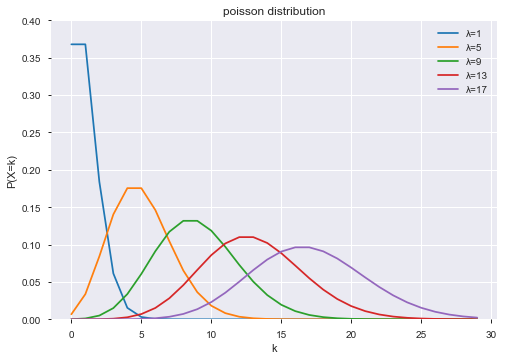

In [ ]:
import numpy as np,matplotlib.pyplot as plt,math
# lam= 一定時間のくる確率 / k  = 一定時間
for lam in range(1,21,4):
    plt.ylim((0,0.4))
    po,x=[],[]    
    for k in range(0,30,1):
        po.append(np.exp(-lam)*lam**k/math.factorial(k))     
        x.append(k)
    plt.plot(x,po,label="λ={}".format(lam))
plt.xlabel("k")
plt.legend(loc="best")    #凡例を表示
plt.ylabel("P(X=k)")
plt.title("poisson distribution")
plt.show()

In [ ]:
df["label_none"].rolling(window=30).mean()


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
          ...   
4905    0.466667
4906    0.500000
4907    0.500000
4908    0.466667
4909    0.466667
4910    0.433333
4911    0.466667
4912    0.466667
4913    0.466667
4914    0.433333
4915    0.400000
4916    0.366667
4917    0.366667
4918    0.400000
4919    0.400000
4920    0.400000
4921    0.366667
4922    0.366667
4923    0.333333
4924    0.333333
4925    0.333333
4926    0.300000
4927    0.300000
4928    0.333333
4929    0.300000
4930    0.300000
4931    0.266667
4932    0.2666

In [ ]:
#df["label_up"].rolling(window=30).mean()

#df["label_down"].rolling(window=30).mean()
lam=df["label_none"].rolling(window=30).mean()

po=np.exp(-lam)*lam